# **Prueba ADL :**-----Científico de Datos----- 

**Dataset:** Vista - Homicidio en tránsito - Datos Abiertos Colombia

**Presentado por:** Jhon Orlando Salguero Parra


El objetivo es presentar el proceso de cargue de datos, exploración, limpieza de datos, visualización y análisis de los homicidios no intencionales como resultado de
un comportamiento negligente, temerario o descuidado durante la utilización
de un vehículo que no esté dirigido intencionalmente a la víctima, de las Ciudades Bogotá, Cartagena, Medellín y Santa Marta. Cada uno de los resultados esta medido en cantidad de víctimas.  Fuente: Datos abiertos, https://www.datos.gov.co/

## **Cargue de datos**

Se importan las librerias necesarias para cargue y exploración de los datos.

In [1]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

Se define la Función cargar_archivos, la cual recibe dos parámetros:  
rutas_carpetas, que debe tener la ruta o las rutas donde están los archivos.  
separador, en este caso los archivos están separados por comas (',').
La función recorre las carpetas para generar un diccionario que va a estar compuesto por el nombre del archivo sin extensión y la ruta del archivo. Se genera el diccionario con todos los archivo.

In [2]:
def cargar_archivos(rutas_carpetas, separador=','):
    
    dataframes = {}
    
    for ruta_carpeta in rutas_carpetas:
        archivos_csv = glob.glob(os.path.join(ruta_carpeta, "*.csv"))
    
        for archivo in archivos_csv:
            nombre_df = os.path.splitext(os.path.basename(archivo))[0]
            dataframes[nombre_df] = pd.read_csv(archivo, sep=separador)
        
    return dataframes

In [3]:
rutas_carpetas = ['Data']
dataframes = cargar_archivos(rutas_carpetas)

Al tener el diccionario se valida el contenido con keys().

In [4]:
dataframes.keys()

dict_keys(['Vista_-_Homicidio_en_tr_nsito_-_Santa_Marta_20241008', 'Vista_-_Homicidio_en_tr_nsito_-_Cartagen_20241008', 'HOMICIDIO_EN_ACCIDENTE_DE_TR_NSITO_20241008', 'Vista_-_Homicidio_en_tr_nsito_-_Medellin_20241008'])

Para acceder rápido a los datasets y tenerlos identificados se asignan como dataframes.  Al revisar la vista de accidentes de tránsito de Bogotá se encuentra que está conformado por cero filas como se evidencia en la captura de pantalla. Para poder continuar con los cuatro datasets se analizaron las fechas de inicio y final de los tres datasets que si estaban correctos, se procedió a crear una vista en la página datos abiertos teniendo en cuenta que la fecha de inicio es el 01 de octubre 2021 hasta el 30 septiembre 2023.

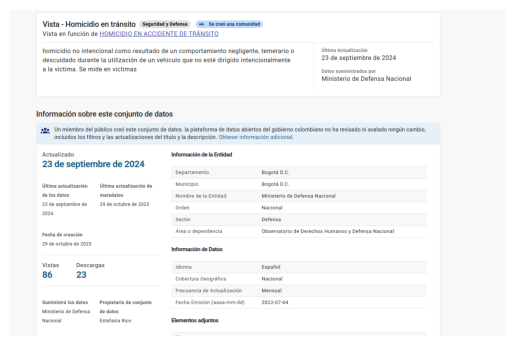

In [5]:
img = mpimg.imread('Screenshot from 2024-10-08 14-36-25.png')  
plt.imshow(img)
plt.axis('off') 
plt.show()

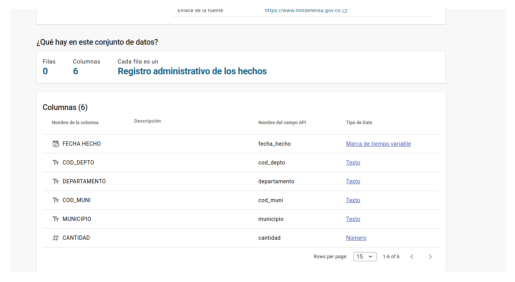

In [6]:
img = mpimg.imread('Screenshot from 2024-10-08 14-36-15.png')  
plt.imshow(img)
plt.axis('off') 
plt.show()

In [7]:
df_Santa_Marta = dataframes['Vista_-_Homicidio_en_tr_nsito_-_Santa_Marta_20241008']
df_Medellin = dataframes['Vista_-_Homicidio_en_tr_nsito_-_Medellin_20241008']
df_Cartagena = dataframes['Vista_-_Homicidio_en_tr_nsito_-_Cartagen_20241008']
df_Bogota = dataframes['HOMICIDIO_EN_ACCIDENTE_DE_TR_NSITO_20241008']

Con la función list se crea una lista con el contenido del diccionario para acceder, recorrerlo y validar si los nombres de las columnas son iguales en todos los dataframes.

In [8]:
lista_dataframes = list(dataframes.keys())

In [9]:
columnas_base = set(dataframes[lista_dataframes[0]].columns)

diferencias = {}

for nombre_df in lista_dataframes[1:]:
    columnas_comparar = set(dataframes[nombre_df].columns)
    diferencias[nombre_df] = columnas_base.symmetric_difference(columnas_comparar)

if all(not diff for diff in diferencias.values()):
    print("Los nombres de las columnas son iguales en todos los DataFrames.")
else:
    print("Diferencias encontradas:")
    for nombre_df, diff in diferencias.items():
        if diff:
            print(f"Diferencias entre bioreactor_14617 y {nombre_df}: {diff}")

Los nombres de las columnas son iguales en todos los DataFrames.


In [10]:
lista_dataframes

['Vista_-_Homicidio_en_tr_nsito_-_Santa_Marta_20241008',
 'Vista_-_Homicidio_en_tr_nsito_-_Cartagen_20241008',
 'HOMICIDIO_EN_ACCIDENTE_DE_TR_NSITO_20241008',
 'Vista_-_Homicidio_en_tr_nsito_-_Medellin_20241008']

Con la validación previa ya se puede proceder a concatenar los dataframes ya, que los cuatro tienen las mismas columnas.

In [11]:
consolidado_H_T = pd.concat(
    [dataframes['Vista_-_Homicidio_en_tr_nsito_-_Santa_Marta_20241008'],
     dataframes['Vista_-_Homicidio_en_tr_nsito_-_Cartagen_20241008'],
     dataframes['HOMICIDIO_EN_ACCIDENTE_DE_TR_NSITO_20241008'],
     dataframes['Vista_-_Homicidio_en_tr_nsito_-_Medellin_20241008']],
    ignore_index=True
)

## **Exploración y limpieza de datos**

El dataset consolidado esta compuesto por 6 columnas.

In [12]:
consolidado_H_T.dtypes

FECHA HECHO     object
COD_DEPTO        int64
DEPARTAMENTO    object
COD_MUNI         int64
MUNICIPIO       object
CANTIDAD         int64
dtype: object

La columna 'FECHA HECHO' tiene datos en formato fecha, por lo cual se procede pasarla  a formato fecha.

In [13]:
consolidado_H_T['FECHA HECHO'] = pd.to_datetime(consolidado_H_T['FECHA HECHO'], format='%d/%m/%Y')

Con la función describre(), Se pueden observar las estadísticas básicas de cada una de las columnas que sean numerica.

In [14]:
consolidado_H_T.describe()

,FECHA HECHO,COD_DEPTO,COD_MUNI,CANTIDAD
count,2318,2318.000000,2318.000000,2318.000000
mean,2022-10-28 03:52:20.293356288,11.967213,11968.470233,1.066437
min,2021-10-01 00:00:00,5.000000,5001.000000,1.000000
25%,2022-05-10 00:00:00,5.000000,5001.000000,1.000000
50%,2022-11-10 00:00:00,11.000000,11001.000000,1.000000
75%,2023-04-15 18:00:00,11.000000,11001.000000,1.000000
max,2023-09-30 00:00:00,47.000000,47001.000000,9.000000
std,NaN,10.608250,10608.397825,0.378403


Un paso Importante es validar se hay datos faltantes en el data set, para esto se hace el bucle y se imprime el porcentaje de valores nulos.

In [15]:
for col in consolidado_H_T.columns:
    pct_missing = np.mean(consolidado_H_T[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

FECHA HECHO - 0%
COD_DEPTO - 0%
DEPARTAMENTO - 0%
COD_MUNI - 0%
MUNICIPIO - 0%
CANTIDAD - 0%


Para una mayor precisión en caso, que existan pocos valores nulos y no se reflejen en porcentaje se realiza la sumatoria y se imprime.

In [16]:
for col in consolidado_H_T.columns:
    missing_count = consolidado_H_T[col].isnull().sum()
    print('{} - {} '.format(col, missing_count))

FECHA HECHO - 0 
COD_DEPTO - 0 
DEPARTAMENTO - 0 
COD_MUNI - 0 
MUNICIPIO - 0 
CANTIDAD - 0 


El dataframe tiene 2318 registros.

In [17]:
len(consolidado_H_T)

2318

In [18]:
consolidado_H_T.head(5)

,FECHA HECHO,COD_DEPTO,DEPARTAMENTO,COD_MUNI,MUNICIPIO,CANTIDAD
0,2021-10-02,47,MAGDALENA,47001,SANTA MARTA,1
1,2021-10-03,47,MAGDALENA,47001,SANTA MARTA,5
2,2021-10-18,47,MAGDALENA,47001,SANTA MARTA,2
3,2021-10-23,47,MAGDALENA,47001,SANTA MARTA,1
4,2021-10-23,47,MAGDALENA,47001,SANTA MARTA,1


Es importante revisar la calidad de los datos disponibles y se es necesario hacer limpieza de los datos que no correspondan o ne sean objeto de estudio.  Para esto se validan los valores unicos de las columnas Departamento y Municipio.

In [19]:
valores_unicos_departamento = consolidado_H_T['DEPARTAMENTO'].unique()
valores_unicos_departamento

array(['MAGDALENA', 'BOLIVAR', 'CAQUETA', 'BOGOTA D.C.', 'ANTIOQUIA'],
      dtype=object)

Se evidencian cuatro registros que no hacen parte de las ciudades que son objeto de estudio, por lo cual se procede a eliminar.

In [20]:
conteo_valores = consolidado_H_T['DEPARTAMENTO'].value_counts()
conteo_valores

DEPARTAMENTO
BOGOTA D.C.    1103
ANTIOQUIA       791
BOLIVAR         240
MAGDALENA       180
CAQUETA           4
Name: count, dtype: int64

In [21]:
conteo_valores_municipio = consolidado_H_T['MUNICIPIO'].value_counts()
conteo_valores_municipio

MUNICIPIO
MEDELLIN                791
BOGOTA, D.C.            680
BOGOTA D.C.             423
SANTA MARTA             180
CARTAGENA               152
CARTAGENA DE INDIAS      88
CARTAGENA DEL CHAIRA      4
Name: count, dtype: int64

Con esto se actualiza el dataframe y queda con todos los datos diferentes a Caquetá.

In [22]:
consolidado_H_T = consolidado_H_T[consolidado_H_T['DEPARTAMENTO'] != 'CAQUETA']

En la columna municipio se evidencia que esta escrito Bogotá y Cartagena de diferente forma.

In [23]:
conteo_valores_municipio1 = consolidado_H_T['MUNICIPIO'].value_counts()
conteo_valores_municipio1

MUNICIPIO
MEDELLIN               791
BOGOTA, D.C.           680
BOGOTA D.C.            423
SANTA MARTA            180
CARTAGENA              152
CARTAGENA DE INDIAS     88
Name: count, dtype: int64

Se procede a reemplazar los valores con escritura diferente.

In [24]:
consolidado_H_T.loc[:,'MUNICIPIO'] = consolidado_H_T['MUNICIPIO'].replace('BOGOTA, D.C.', 'BOGOTA',regex=True)
consolidado_H_T.loc[:,'MUNICIPIO'] = consolidado_H_T['MUNICIPIO'].replace('BOGOTA D.C.', 'BOGOTA',regex=True)
consolidado_H_T.loc[:,'MUNICIPIO'] = consolidado_H_T['MUNICIPIO'].replace('CARTAGENA DE INDIAS', 'CARTAGENA',regex=True)

In [25]:
conteo_valores_municipio2 = consolidado_H_T['MUNICIPIO'].value_counts()
conteo_valores_municipio2

MUNICIPIO
BOGOTA         1103
MEDELLIN        791
CARTAGENA       240
SANTA MARTA     180
Name: count, dtype: int64

## **Análisis y visualización de datos**

Se valida el rango de las fechas para los cuatro datasets.

In [26]:
fecha_inicio_fin =consolidado_H_T.groupby('MUNICIPIO')['FECHA HECHO'].agg(['min', 'max']).reset_index()
fecha_inicio_fin

,MUNICIPIO,min,max
0,BOGOTA,2021-10-01,2023-09-30
1,CARTAGENA,2021-10-01,2023-09-28
2,MEDELLIN,2021-10-01,2023-09-29
3,SANTA MARTA,2021-10-02,2023-09-30


Se calcula la cantidad de homicidios por cada una de las ciudades teniendo a Bogotá como la ciudad con mayor cantidad de víctimas en accidentes de tránsito con 1162 y en segundo lugar se encuentra Medellín con 866 víctimas.

In [27]:
total_homicidios_municipio = consolidado_H_T.groupby('MUNICIPIO')['CANTIDAD'].sum().reset_index()
total_homicidios_municipio.rename(columns={'CANTIDAD': 'TOTAL_HOMICIDIOS'}, inplace=True)
total_homicidios_municipio = total_homicidios_municipio.sort_values(by='TOTAL_HOMICIDIOS', ascending=False).reset_index(drop=True)
total_homicidios_municipio

,MUNICIPIO,TOTAL_HOMICIDIOS
0,BOGOTA,1162
1,MEDELLIN,866
2,CARTAGENA,245
3,SANTA MARTA,195


Se evidencia que Bogotá durante el periodo comprendido entre octubre 2021 y septiembre 2023 tuvó el 47% del total de víctimas en accidentes de tránsito que corresponde a 1162, Medellín tuvó un 35% del total de las víctimas con 866, Cartagena tuvó un 10% y Santa Marta un 8% del total de las víctimas.

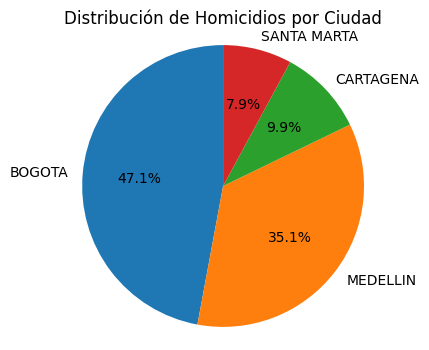

In [28]:
plt.figure(figsize=(4, 4))  
plt.pie(total_homicidios_municipio['TOTAL_HOMICIDIOS'], 
        labels=total_homicidios_municipio['MUNICIPIO'], 
        autopct='%1.1f%%',
        startangle=90)  #

plt.title('Distribución de Homicidios por Ciudad')
plt.axis('equal')  
plt.show()

En el año 2022, Bogotá experimentó un notable aumento en la cantidad de víctimas por accidentes de tránsito, lo que refleja un fuerte crecimiento en la siniestralidad vial en la ciudad. Por otro lado, Cartagena y Santa Marta mostraron un crecimiento lineal en el número de víctimas, con una pendiente casi nula, lo que indica que el número de accidentes se ha mantenido relativamente estable en los últimos años, sin cambios significativos en la tendencia.

In [29]:
consolidado_H_T['AÑO'] = consolidado_H_T['FECHA HECHO'].dt.year

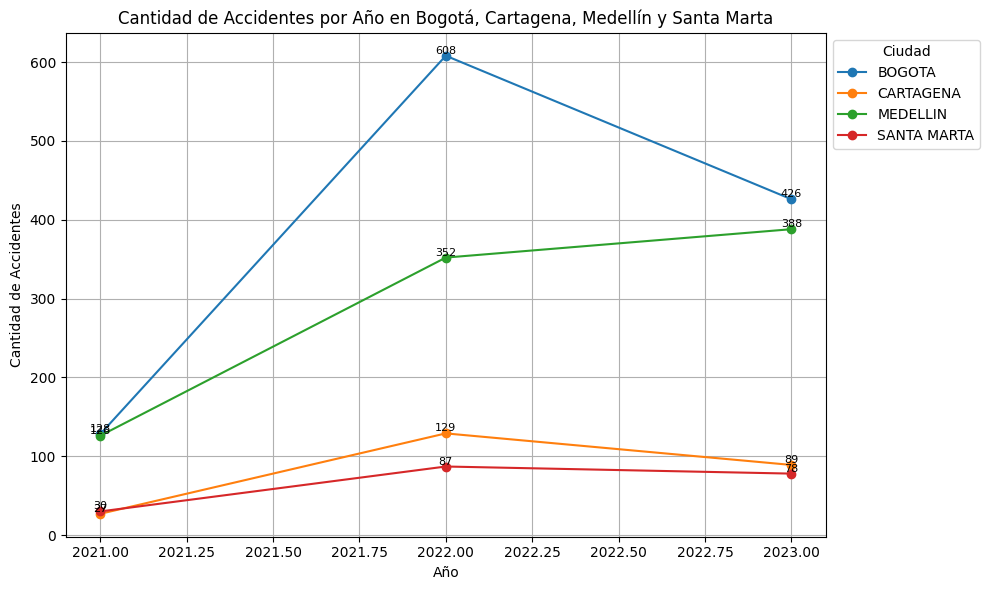

In [30]:
accidentes_por_anio_ciudad = consolidado_H_T.groupby(['AÑO', 'MUNICIPIO'])['CANTIDAD'].sum().unstack()

plt.figure(figsize=(10, 6))  # Ajustar el tamaño del gráfico

for ciudad in accidentes_por_anio_ciudad.columns:
    plt.plot(accidentes_por_anio_ciudad.index, accidentes_por_anio_ciudad[ciudad], marker='o', label=ciudad)
    
    for x, y in zip(accidentes_por_anio_ciudad.index, accidentes_por_anio_ciudad[ciudad]):
        plt.text(x, y, str(y), fontsize=8, ha='center', va='bottom')  

plt.title('Cantidad de Accidentes por Año en Bogotá, Cartagena, Medellín y Santa Marta')
plt.xlabel('Año')
plt.ylabel('Cantidad de Accidentes')
plt.legend(title='Ciudad', bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(True) 

plt.tight_layout() 
plt.show()


Se crea una columna para extraer el mes del dataset y validar el mes con mayor cantidad víctimas en accidentes de tránsito.

In [31]:
consolidado_H_T['MES'] = consolidado_H_T['FECHA HECHO'].dt.month

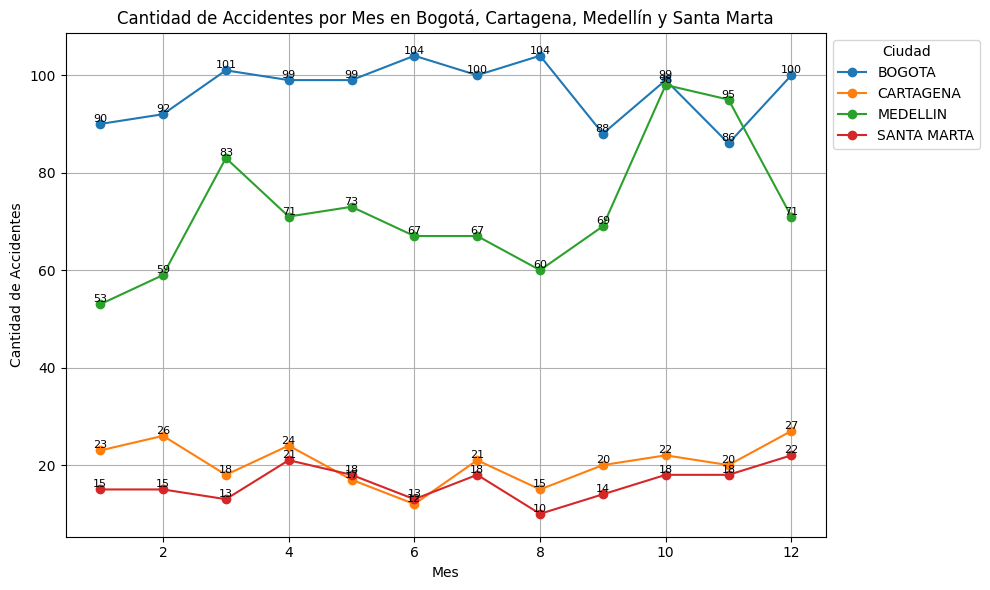

In [32]:
accidentes_por_mes_ciudad = consolidado_H_T.groupby(['MES', 'MUNICIPIO'])['CANTIDAD'].sum().unstack()

plt.figure(figsize=(10, 6)) 

for ciudad in accidentes_por_mes_ciudad.columns:
    plt.plot(accidentes_por_mes_ciudad.index, accidentes_por_mes_ciudad[ciudad], marker='o', label=ciudad)
    
    for x, y in zip(accidentes_por_mes_ciudad.index, accidentes_por_mes_ciudad[ciudad]):
        plt.text(x, y, str(y), fontsize=8, ha='center', va='bottom')  

plt.title('Cantidad de Accidentes por Mes en Bogotá, Cartagena, Medellín y Santa Marta')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Accidentes')
plt.legend(title='Ciudad', bbox_to_anchor=(1, 1), loc='upper left')  
plt.grid(True)  

plt.tight_layout() 
plt.show()


Diciembre destaca como el mes con la mayor cantidad de víctimas por accidentes de tránsito en Cartagena y Santa Marta, con 27 y 22 víctimas respectivamente. En Medellín, octubre presenta el pico más alto, con 98 víctimas, mientras que Bogotá registra el mayor número de accidentes en los meses de junio y agosto, ambos con 104 víctimas cada uno. Estos datos sugieren patrones estacionales y regionales que podrían estar relacionados con factores como el aumento de tráfico durante ciertas festividades o condiciones climáticas específicas.


Se crea una columna para extraer el mes del dataset y validar el mes con mayor cantidad víctimas en accidentes de tránsito.

In [33]:
consolidado_H_T['DIA'] = consolidado_H_T['FECHA HECHO'].dt.day

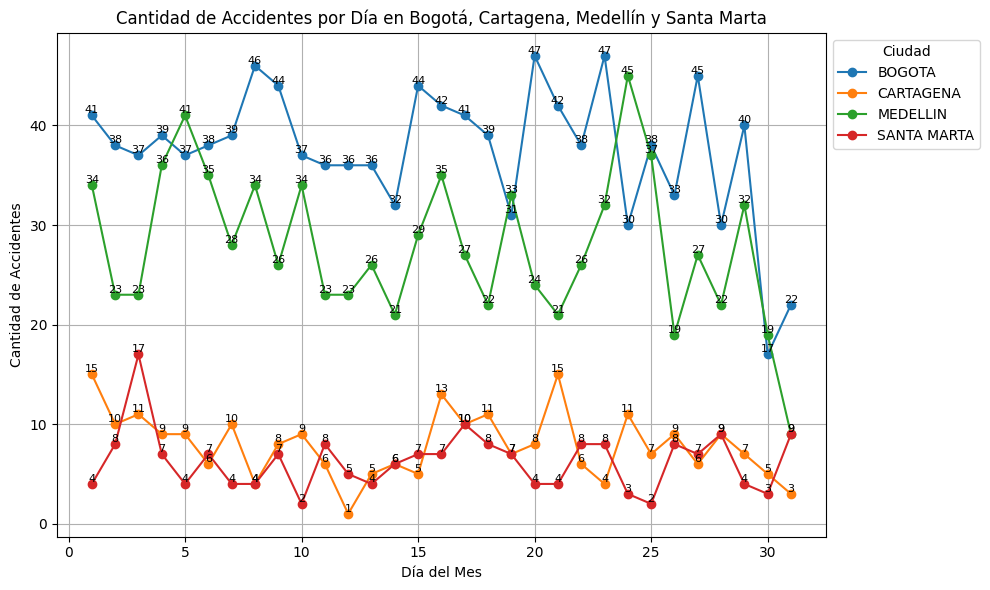

In [34]:
accidentes_por_dia_ciudad = consolidado_H_T.groupby(['DIA', 'MUNICIPIO'])['CANTIDAD'].sum().unstack()

plt.figure(figsize=(10, 6)) 

for ciudad in accidentes_por_dia_ciudad.columns:
    plt.plot(accidentes_por_dia_ciudad.index, accidentes_por_dia_ciudad[ciudad], marker='o', label=ciudad)
    
    for x, y in zip(accidentes_por_dia_ciudad.index, accidentes_por_dia_ciudad[ciudad]):
        plt.text(x, y, str(y), fontsize=8, ha='center', va='bottom')  

plt.title('Cantidad de Accidentes por Día en Bogotá, Cartagena, Medellín y Santa Marta')
plt.xlabel('Día del Mes')
plt.ylabel('Cantidad de Accidentes')
plt.legend(title='Ciudad', bbox_to_anchor=(1, 1), loc='upper left')  #
plt.grid(True)  

plt.tight_layout() 
plt.show()

In [35]:
accidentes_por_dia_ciudad.head(3)

MUNICIPIO,BOGOTA,CARTAGENA,MEDELLIN,SANTA MARTA
DIA,,,,
1,41,15,34,4
2,38,10,23,8
3,37,11,23,17


## **Recomendaciones**

**Campañas de Sensibilización Vial en Bogotá y Medellín**  
De acuerdo con las tendencias observadas en las ciudades objeto de estudio, es fundamental implementar campañas de sensibilización dirigidas a los actores viales en Bogotá y Medellín. La cantidad de víctimas por accidentes de tránsito ha mostrado un crecimiento preocupante en los últimos años. Este incremento no solo afecta la seguridad de los ciudadanos, sino que también impacta en la calidad de vida de las comunidades y genera un costo significativo para el sistema de salud pública y la economía local.  La campaña puede estar enfoca en crear consciencia en los conductores, peatones y ciclistas sobre la importancia de la seguridad vial y el cumplimiento de las normas de tránsito.    

**Propuesta de Estudio sobre el Estado de las Vías en Bogotá y Medellín**  
De acuerdo con las tendencias presentadas en las ciudades objeto de estudio, es fundamental llevar a cabo un análisis exhaustivo del estado de las vías en Bogotá y Medellín. Factores como los huecos, la iluminación deficiente, la semaforización inadecuada, y la falta de puentes peatonales pueden tener un impacto significativo en la seguridad vial y contribuir al aumento de víctimas en accidentes de tránsito. Este estudio no solo permitirá identificar los problemas existentes en la infraestructura vial, sino que también proporcionará recomendaciones basadas en evidencia para mejorar la seguridad en las vías.  _______________________________________________________________